<a href="https://colab.research.google.com/github/leonardoub/SCRIPT_PALERMO/blob/master/Easy_features_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [0]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


#Load data

In [5]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
train_dataset_path = '/gdrive/My Drive/AIM_PA/database_training2.csv'
test_dataset_path = '/gdrive/My Drive/AIM_PA/database_nostro_without_nan.csv'

In [0]:
df_train = pd.read_csv(train_dataset_path)
df_test = pd.read_csv(test_dataset_path)

In [0]:
df_train.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_test.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_train.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)
df_test.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)

In [0]:
public_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
PA_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
#easy features paper
#Energy, Entropy, Kurtosis, Maximum, Mean, Mean Absolute Deviation,
#Median, Minimum, Range, RMS Value, Skewness, Standard Deviation, 
#Uniformity, Variance, Compactness, 
#Maximum 3D diameter, Spherical Disproportion, Sphericity, 
#Surface Area, Surface-to-Volume Ratio, and Volume

#easy_features_dataset
#VoxelVolume, Maximum3DDiameter, MeshVolume, MajorAxisLength,
#Sphericity, LeastAxisLength, Elongation, SurfaceVolumeRatio,
#Maximum2DDiameterSlice, Flatness, SurfaceArea, MinorAxisLength,
#Skewness, Uniformity, Median, Energy, MeanAbsoluteDeviation, 
#TotalEnergy?, Maximum, Minimum, Entropy, Range, Variance, Kurtosis,
#Mean

In [0]:
easy_features_dataset = ['VoxelVolume', 'Maximum3DDiameter', 'MeshVolume', 'MajorAxisLength', 'Sphericity', 
                         'LeastAxisLength', 'Elongation', 'SurfaceVolumeRatio', 'Maximum2DDiameterSlice', 
                         'Flatness', 'SurfaceArea', 'MinorAxisLength', 'Skewness', 'Uniformity', 'Median', 
                         'Energy', 'MeanAbsoluteDeviation', 'TotalEnergy', 'Maximum', 'Minimum', 'Entropy', 
                         'Range', 'Variance', 'Kurtosis', 'Mean']


In [0]:
public_data = public_data[easy_features_dataset]

In [0]:
PA_data = PA_data[easy_features_dataset]

In [17]:
public_data.columns

Index(['VoxelVolume', 'Maximum3DDiameter', 'MeshVolume', 'MajorAxisLength',
       'Sphericity', 'LeastAxisLength', 'Elongation', 'SurfaceVolumeRatio',
       'Maximum2DDiameterSlice', 'Flatness', 'SurfaceArea', 'MinorAxisLength',
       'Skewness', 'Uniformity', 'Median', 'Energy', 'MeanAbsoluteDeviation',
       'TotalEnergy', 'Maximum', 'Minimum', 'Entropy', 'Range', 'Variance',
       'Kurtosis', 'Mean'],
      dtype='object')

In [0]:
public_labels = df_train.Histology

In [0]:
PA_labels = df_test.Histology

#Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(public_data, public_labels, test_size=0.3, stratify=public_labels, random_state=1)

In [22]:
X_train.shape

(91, 25)

In [23]:
y_train

59                  large cell
60                  large cell
23                  large cell
121    squamous cell carcinoma
69                  large cell
                ...           
117    squamous cell carcinoma
55                  large cell
123    squamous cell carcinoma
126    squamous cell carcinoma
73                  large cell
Name: Histology, Length: 91, dtype: object

#Vettorizzare i label

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_labels_encoded = encoder.fit_transform(y_train)
test_labels_encoded = encoder.transform(y_test)

#Scalers

In [0]:
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer

In [0]:
scalers_to_test = [StandardScaler(), RobustScaler()]

#RandomForestClassifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
steps = [('scaler', StandardScaler()), ('red_dim', PCA()), ('clf', RandomForestClassifier())]

In [0]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

In [0]:
n_tree = np.arange(10, 120, 10)

In [0]:
n_tree = list(n_tree)

In [0]:
parameteres = [{'scaler':scalers_to_test, 'red_dim':[LinearDiscriminantAnalysis()], 'red_dim__n_components':[2], 'clf__n_estimators':n_tree},
               {'scaler':scalers_to_test, 'red_dim':[PCA()], 'red_dim__n_components':[9], 'clf__n_estimators':n_tree}]

In [0]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [0]:
grid = RandomizedSearchCV(pipeline, param_distributions=parameteres, n_iter=30, cv=5, verbose=1)

In [35]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   16.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('red_dim',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=None,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                                             ('clf',
                                              RandomForestClassifier(bootstrap=True,
             

In [36]:
print(f'score = {grid.score(X_test, y_test)}')

score = 0.55


In [37]:
print(grid.best_params_)

{'scaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), 'red_dim__n_components': 9, 'red_dim': PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'clf__n_estimators': 20}


In [0]:
estimator = grid.best_estimator_

In [39]:
estimator

Pipeline(memory=None,
         steps=[('scaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('red_dim',
                 PCA(copy=True, iterated_power='auto', n_components=9,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf

In [41]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


Automatically created module for IPython interactive environment


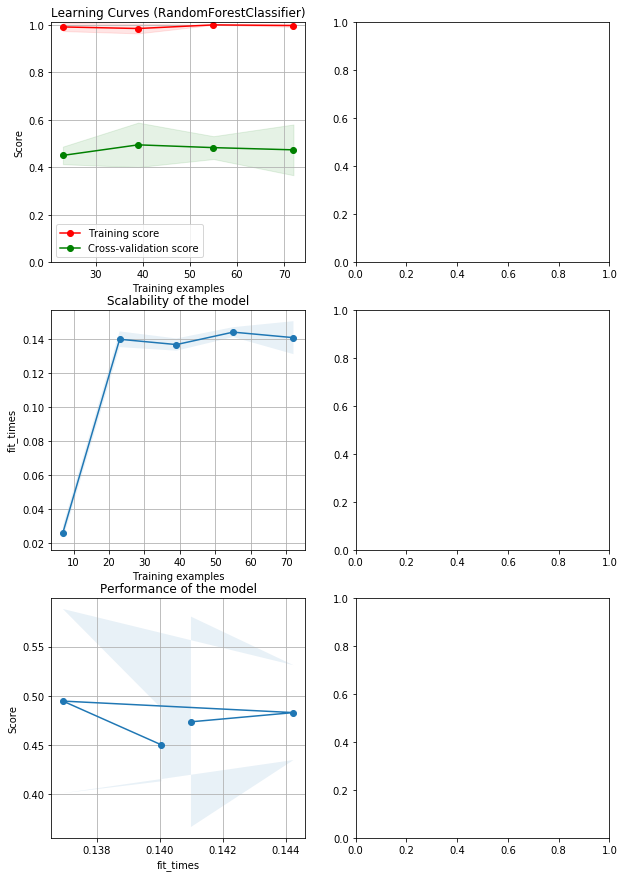

In [42]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (RandomForestClassifier)"

plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.0, 1.01), cv=5, n_jobs=4)

plt.show()

In [0]:
from sklearn import metrics

In [0]:
rf_predictions = estimator.predict(X_test)

In [47]:
rf_predictions

array(['squamous cell carcinoma', 'large cell', 'large cell',
       'large cell', 'adenocarcinoma', 'large cell', 'large cell',
       'squamous cell carcinoma', 'large cell', 'squamous cell carcinoma',
       'large cell', 'large cell', 'large cell', 'large cell',
       'large cell', 'squamous cell carcinoma', 'squamous cell carcinoma',
       'squamous cell carcinoma', 'squamous cell carcinoma', 'large cell',
       'squamous cell carcinoma', 'large cell', 'large cell',
       'large cell', 'squamous cell carcinoma', 'adenocarcinoma',
       'large cell', 'squamous cell carcinoma', 'large cell',
       'squamous cell carcinoma', 'large cell', 'large cell',
       'large cell', 'squamous cell carcinoma', 'large cell',
       'large cell', 'large cell', 'large cell',
       'squamous cell carcinoma', 'squamous cell carcinoma'], dtype=object)

In [49]:
print (metrics.classification_report(y_test, rf_predictions))

                         precision    recall  f1-score   support

         adenocarcinoma       0.50      0.20      0.29         5
             large cell       0.54      0.68      0.60        19
squamous cell carcinoma       0.57      0.50      0.53        16

               accuracy                           0.55        40
              macro avg       0.54      0.46      0.47        40
           weighted avg       0.55      0.55      0.54        40



In [50]:
print ("Overall Accuracy:", round(metrics.accuracy_score(y_test, rf_predictions), 3))

Overall Accuracy: 0.55
